# Анализ цен и объема торгов за 10 лет (с 2013 по 2023) акций Alphabet Inc. (GOOG) в долларах США

Подготовила: Данилова Дарья, ЭФ БГУ

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from dateutil import parser as dt_parser

Date - дата, когда стала известна стоимость чистых активов;
Open - цена открытия для указанной даты;
High - самая высокая цена за день;
Low - самая низкая цена за день;
Close - цена закрытия для указанной даты;
Adj Close -  «отрегулированная» цена закрытия (adjusted closing price), это значит, что в цену закрытия периода были добавлены все действия с акциями, которые могли быть совершены до момента открытия следующего торгового дня;
Volume - объем торгов за день;
1e9 = 1 · 10⁹ = 1000 000 000  (один миллиард).

In [2]:
pd.read_csv('goog.csv', delimiter=',')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-01,21.743500,22.685966,21.101406,21.927061,21.927061,1950507679
1,2013-07-01,22.078493,23.113365,21.808506,22.110872,22.110872,2057503228
2,2013-08-01,22.291447,22.657824,21.060062,21.093437,21.093437,1344504713
3,2013-09-01,21.279240,22.565170,21.269028,21.815977,21.815977,1329906200
4,2013-10-01,21.924072,25.940767,20.995804,25.668289,25.668289,2217259798
...,...,...,...,...,...,...,...
115,2023-01-01,89.830002,101.580002,85.570000,99.870003,99.870003,526178100
116,2023-02-01,99.739998,108.820000,88.860001,90.300003,90.300003,754400500
117,2023-03-01,90.160004,107.510002,89.769997,104.000000,104.000000,725464400
118,2023-04-01,102.669998,109.629997,102.379997,108.220001,108.220001,461648200


Выбросы и очищенные данные

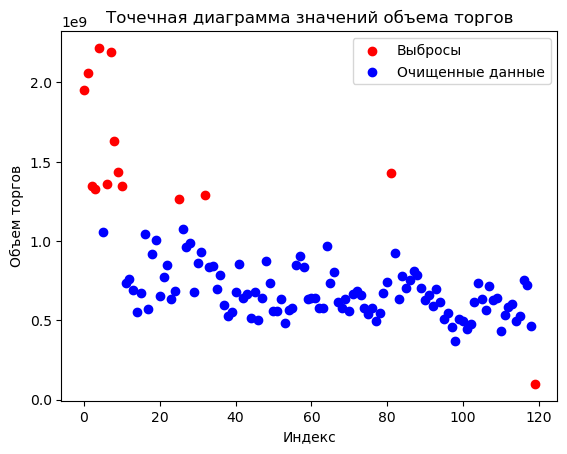

In [10]:
# Чтение данных из CSV-файла
data = pd.read_csv('goog.csv', delimiter=',')

# Описание данных
data_stats = data.describe()

# Вычисление границ выбросов с использованием интерквартильного размаха
q1 = data_stats.loc['25%', 'Volume']
q3 = data_stats.loc['75%', 'Volume']
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Очистка данных от выбросов
clean_data = data[(data['Volume'] >= lower_bound) & (data['Volume'] <= upper_bound)]

# Построение точечной диаграммы значений выбросов
outliers = data[(data['Volume'] < lower_bound) | (data['Volume'] > upper_bound)]
plt.scatter(outliers.index, outliers['Volume'], color='red', label='Выбросы')

# Построение точечной диаграммы значений очищенных данных
plt.scatter(clean_data.index, clean_data['Volume'], color='blue', label='Очищенные данные')

# Добавление подписей осей и заголовка
plt.xlabel('Индекс')
plt.ylabel('Объем торгов')
plt.title('Точечная диаграмма значений объема торгов')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

Оценки центрального положения для объема торгов

In [4]:
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv('goog.csv', delimiter=',')

# Вычисление статистических метрик для очищенных данных
mean = clean_data['Volume'].mean()
median = clean_data['Volume'].median()
mode = clean_data['Volume'].mode()

# Вывод результатов
print(f"Среднее значение: {mean:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Мода: {mode[0]:.2f}")


Среднее значение: 675046991.45
Медиана: 642774000.00
Мода: 372312000.00


Анализ распределения значений и исследование отклонения для объема торгов

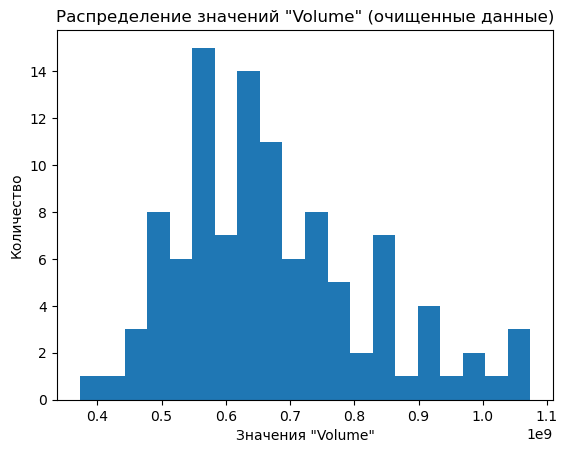

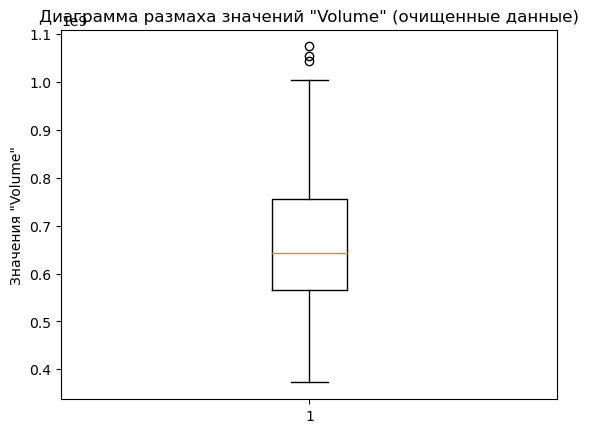

Стандартное отклонение (очищенные данные): 149295620.87152493


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('goog.csv', delimiter=',')

# Рассчет стандартного отклонения очищенных данных
std = clean_data['Volume'].std()

# Визуализация распределения очищенных данных
plt.hist(clean_data['Volume'], bins=20)
plt.xlabel('Значения "Volume"')
plt.ylabel('Количество')
plt.title('Распределение значений "Volume" (очищенные данные)')
plt.show()

# Построение диаграммы размаха для очищенных данных
plt.boxplot(clean_data['Volume'])
plt.ylabel('Значения "Volume"')
plt.title('Диаграмма размаха значений "Volume" (очищенные данные)')
plt.show()

# Вывод результатов
print("Стандартное отклонение (очищенные данные):", std)